In [102]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import alphashape
from descartes import PolygonPatch
import numpy as np

path="/home/alguero/Work/smodelsv2-paper/IDM-Scoto/scalar_DM_scenario/plots"
df = pd.read_csv("scalarData.csv")
fer = pd.read_csv("scalarDataFermions.csv")
df['topo'] = df['topo'].apply(lambda x: x.replace("'", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("[", ""))
df['topo'] = df['topo'].apply(lambda x: x.replace("]", ""))
df=df.sort_values(by='rmax', ascending=True)
df

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
9558,499.4427,386.3139,385.8176,0.4963,0.004635,0.000015,ATLAS-SUSY-2016-06,3.617189e-07,ATLAS-SUSY-2016-32,0.000015,3.617189e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-4206.slha
10704,456.0158,390.7605,390.2674,0.4931,0.004730,0.000017,ATLAS-SUSY-2016-06,4.148812e-07,ATLAS-SUSY-2016-32,0.000017,4.148812e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-45.slha
2555,402.8527,377.3270,376.8308,0.4962,0.004637,0.000018,ATLAS-SUSY-2016-06,3.454690e-07,ATLAS-SUSY-2016-32,0.000018,3.454690e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-3199.slha
20792,443.2197,374.8294,374.3386,0.4908,0.004797,0.000025,ATLAS-SUSY-2016-06,6.430207e-07,CMS-SUS-16-033,0.000025,2.998199e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-564.slha
10257,390.6307,363.9185,363.4252,0.4933,0.004724,0.000027,ATLAS-SUSY-2016-06,2.034610e-07,ATLAS-SUSY-2016-32,0.000027,2.034610e-07,"TDTM1S, TDTM2S",TDTM1S,True,idm-batch2-pt-65.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26695,182.7784,179.8040,179.7440,0.0600,1747.248351,85.874400,ATLAS-SUSY-2016-32,3.773128e+01,CMS-EXO-13-006,0.000000,8.587440e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3411.slha
19059,177.3467,173.1297,173.0513,0.0784,459.153336,87.611960,ATLAS-SUSY-2016-32,3.344831e+01,CMS-EXO-13-006,0.000000,8.761196e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-3147.slha
8070,176.4480,173.6519,173.5733,0.0786,455.120679,88.075270,ATLAS-SUSY-2016-32,3.655520e+01,CMS-EXO-13-006,0.000000,8.807527e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-4518.slha
6463,177.2137,173.7134,173.6534,0.0600,1747.276200,88.880680,ATLAS-SUSY-2016-32,3.885162e+01,CMS-EXO-13-006,0.000000,8.888068e+01,THSCPM1b,THSCPM1b,False,idm-batch2-pt-1838.slha


In [103]:
excl = df[df['rmax'] > 1]
ald = df[~(df['rmax'] > 1)]
near = df[(0.5 < df['rmax']) & (df['rmax'] < 1.)]
dt = df[df['rmaxDT']>1]
atlas = dt[dt.ana.str.contains('ATLAS')]
dtf = fer[fer['rmaxDT']>1]
cms = dtf[dtf.ana.str.contains('CMS')]
atlasf = fer[((fer.ana.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax'] > 1)) | ((fer.ana2.str.contains('ATLAS-SUSY-2016-06')) & (fer['rmax2'] > 1))]
hscp = df[df['rmaxHSCP']>1]
analyses = excl.ana.unique()
topos = excl.bestTx.unique()
dtf

,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
3,215.3913,161.1239,160.9843,0.1396,6.400029,4.235900,CMS-EXO-13-006,1.929840,ATLAS-SUSY-2016-32,1.645499,4.235900e+00,"['THSCPM1b', 'THSCPM2b', 'THSCPM8', 'THSCPM9']",THSCPM2b,False,idm-batch9-pt-1614.slha
20,194.8494,163.7547,163.6103,0.1444,0.711640,6.859412,CMS-EXO-19-010,0.969082,ATLAS-SUSY-2016-06,6.859412,1.891964e-03,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch1-pt-3192.slha
35,133.0621,131.9858,131.8292,0.1566,0.311665,10.812680,CMS-EXO-19-010,2.251090,ATLAS-SUSY-2016-06,10.812680,2.209683e-06,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch1-pt-1573.slha
37,390.2099,311.8026,311.6612,0.1414,1.225731,1.052249,CMS-EXO-19-010,0.138806,ATLAS-SUSY-2016-06,1.052249,7.642328e-03,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch6-pt-3278.slha
41,187.5328,170.7407,170.5858,0.1549,0.337185,6.143447,CMS-EXO-19-010,1.273985,ATLAS-SUSY-2016-06,6.143447,2.943936e-06,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch2-pt-1107.slha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29189,138.2667,113.5008,113.2483,0.2525,0.040597,1.764703,ATLAS-SUSY-2016-06,0.926911,CMS-EXO-19-010,1.764703,1.153422e-06,"['TDTM1F', 'TDTM2F']",TDTM2F,True,idm-batch2-pt-4793.slha
29196,239.0096,214.2812,214.1383,0.1429,0.869529,3.440381,CMS-EXO-19-010,0.461489,ATLAS-SUSY-2016-06,3.440381,3.721126e-03,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch6-pt-2074.slha
29200,227.1454,175.1443,175.0047,0.1396,6.402330,6.411674,CMS-EXO-13-006,3.306583,ATLAS-SUSY-2016-32,1.337597,6.411674e+00,"['THSCPM1b', 'THSCPM2b', 'THSCPM8', 'THSCPM9']",THSCPM2b,False,idm-batch8-pt-1662.slha
29206,234.2764,203.7436,203.5625,0.1811,0.143967,2.011628,CMS-EXO-19-010,0.912485,ATLAS-SUSY-2016-06,2.011628,5.147423e-07,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch2-pt-3782.slha


In [104]:
tot = df.shape[0]
for ana in analyses:
    part = df[df['ana'] == ana].shape[0]
    percent = part/tot
    print(ana, percent*100)

ATLAS-SUSY-2016-32 28.548939082819984
CMS-EXO-13-006 37.05681040383299
ATLAS-SUSY-2016-06 34.394250513347025


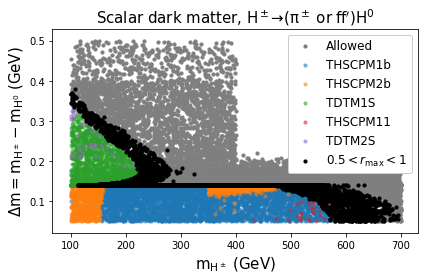

In [105]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['deltaM'], color='tab:grey', label="Allowed", s=10)
# plt.scatter(excl['deltaM'], excl['mHc'])
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['deltaM'], label=label, s=10, alpha=0.5)
plt.scatter(near['mHc'], near['deltaM'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

# plt.ylim(0,700)
# plt.xlim(0,800)
plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

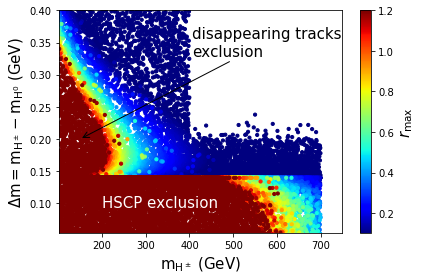

In [106]:
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.scatter(df['mHc'],df['deltaM'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=15)

####Disappearing tracks
# frame_analysis2d=dt[['mHc','deltaM']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',fill=False,zorder=20,lw=2,label='disappearing tracks excl.'))

# ####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','deltaM']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=2,label='DT fermions excl.'))

        
# ####HSCP
# frame_analysis2d=hscp[['mHc','deltaM']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .001)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP excl.'))

# lgd = plt.legend(loc='upper right',fontsize=12), 

plt.text(200, 0.1, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
plt.annotate(xy=(150, 0.2), xytext=(405, 0.35), s="disappearing tracks\nexclusion", color='black', fontsize=15, 
             arrowprops={'arrowstyle':'->'}, ha='left', va='center')

plt.ylim(0.053,0.4)
plt.xlim(101,750)
# plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{\Delta m = m_{H^\pm} - m_{H^0}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "scalarDeltaM.png")
plt.savefig(file)
plt.show()

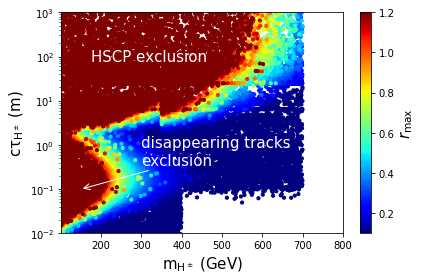

In [107]:
plt.figure(figsize=(6,4))
ax = plt.gca()
plt.scatter(df['mHc'],df['dHc'],c=df['rmax'],alpha=1,cmap='jet',vmax=1.2,vmin=.1, s=10)
cb = plt.colorbar()
cb.set_label(label=r'$r_{\rm{max}}$', fontsize=15)

# ####Disappearing tracks
# frame_analysis2d=dt[['mHc','dHc']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',fill=False,zorder=20,lw=2,label='disappearing tracks excl.'))

# ####Disappearing tracks with fermions
# frame_analysis2d=dtf[['mHc','dHc']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# alpha_shape = alphashape.alphashape(frame_analysis2d, .01)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='black',ls='--',fill=False,zorder=20,lw=2,label='dis. tracks fermions eff.'))
        
# ####HSCP
# frame_analysis2d=hscp[['mHc','dHc']]
# frame_analysis2d=frame_analysis2d.to_numpy()
# # Function for varying the alpha parameter
# def alf(ind, r):
#     if any(frame_analysis2d[ind][:,0] < 200) and any(frame_analysis2d[ind][:,1] < 7):
#         return .05
# #     elif any(frame_analysis2d[ind][:,0] < 280) and any(frame_analysis2d[ind][:,1] < 10):
# #         return .0002
#     elif any(frame_analysis2d[ind][:,0] < 380) and any(frame_analysis2d[ind][:,1] < 10):
#         return .3
#     else:
#         return .008                
                
# alpha_shape = alphashape.alphashape(frame_analysis2d, alf)
# ax.add_patch(PolygonPatch(alpha_shape, alpha=1,ec='white',fill=False,zorder=20,lw=2,label='HSCP excl.'))

# lgd = plt.legend(loc='lower right', fontsize=12)

plt.text(175, 100, "HSCP exclusion", color='white', fontsize=15, ha='left', va='center')
plt.annotate(xy=(150, 0.1), xytext=(300, 0.7), s="disappearing tracks\nexclusion", color='white', fontsize=15, 
             arrowprops={'arrowstyle':'->', 'color':'white'}, ha='left', va='center')

plt.ylim(1e-2,1e3)
plt.xlim(101,800)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 25)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (m)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "scalarWidth.png")
plt.savefig(file)
plt.show()

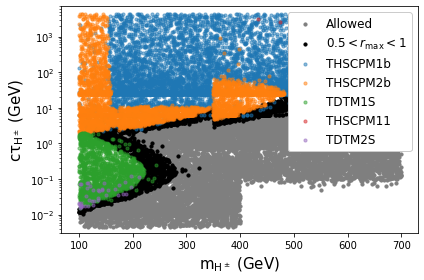

In [108]:
plt.figure(figsize=(6,4))
plt.scatter(ald['mHc'], ald['dHc'], color='tab:grey', label="Allowed", s=10)
plt.scatter(near['mHc'], near['dHc'], color='black', label=r"$0.5<r_{\rm{max}}<1$", s=10)
for topo in topos:
    toplot = excl[excl['bestTx']==topo]
    label = topo
    plt.scatter(toplot['mHc'], toplot['dHc'], label=label, alpha=0.5, s=10)


lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
plt.show()

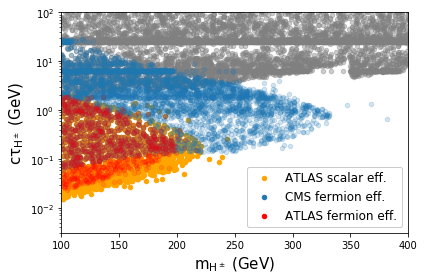

---slhas excluded by cms for which mHc > 340 GeV---


,mA0,mHc,mH0,deltaM,dHc,rmax,ana,rmax2,ana2,rmaxDT,rmaxHSCP,topo,bestTx,pions,slha
11415,384.4951,381.6958,381.5508,0.1450,0.660551,1.068842,CMS-EXO-19-010,0.185753,ATLAS-SUSY-2016-06,1.068842,0.000357,"['TDTM1F', 'TDTM2F']",TDTM1F,True,idm-batch2-pt-3884.slha
18925,349.3135,347.2687,347.1275,0.1412,1.277464,1.201246,CMS-EXO-19-010,0.161967,ATLAS-SUSY-2016-06,1.201246,0.009124,"['TDTM1F', 'TDTM2F']",TDTM2F,True,idm-batch6-pt-846.slha
23626,371.2713,367.5955,367.4543,0.1412,1.303932,1.008553,CMS-EXO-19-010,0.137173,ATLAS-SUSY-2016-06,1.008553,0.020020,"['TDTM1F', 'TDTM2F']",TDTM2F,True,idm-batch6-pt-762.slha


In [109]:
plt.figure(figsize=(6,4))
plt.scatter(hscp['mHc'], hscp['dHc'], s=20, color='grey', alpha=0.4)
plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS scalar eff.", s=20, color='orange')
plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS fermion eff.", s=20, alpha = 0.2, color='C0')
plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS fermion eff.", s=20, color='red', alpha=0.15)


lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)
for lh in lgd.legendHandles: 
    lh.set_alpha(1)

plt.ylim(3E-3,1E2)
plt.xlim(100,400)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparison.png")
plt.savefig(file)
plt.show()
print("---slhas excluded by cms for which mHc > 340 GeV---")
cms[cms['mHc']>340]

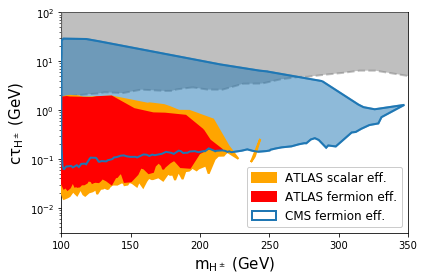

In [110]:
plt.figure(figsize=(6,4))
# plt.scatter(hscp['mHc'], hscp['dHc'],s=20, color='grey', alpha=0.2)
ax = plt.gca()
# plt.scatter(atlas['mHc'], atlas['dHc'], label=r"ATLAS-SUSY-2016-06 scalar eff.", s=20, color='orange')
# plt.scatter(cms['mHc'], cms['dHc'], label=r"CMS-EXO-19-010 fermions eff.", s=20, alpha = 0.2, color='C0')
# plt.scatter(atlasf['mHc'], atlasf['dHc'], label=r"ATLAS-SUSY-2016-06 fermion eff.", s=20, color='red', alpha=0.15)

frame_analysis2d=hscp[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaHscp = alphashape.alphashape(frame_analysis2d, .005)

frame_analysis2d=atlas[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaAtlas = alphashape.alphashape(frame_analysis2d, .005)

frame_analysis2d=atlasf[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaFatlas = alphashape.alphashape(frame_analysis2d, .005)

frame_analysis2d=cms[['mHc','dHc']]
frame_analysis2d=frame_analysis2d.to_numpy()
alphaCms = alphashape.alphashape(frame_analysis2d, .005)

ax.add_patch(PolygonPatch(alphaHscp, alpha=.5,ec='grey',fc='grey',ls='--',fill=True,zorder=20,lw=2))
ax.add_patch(PolygonPatch(alphaCms, alpha=.5,ec='C0',fc='C0',fill=True,zorder=20,lw=2))
ax.add_patch(PolygonPatch(alphaAtlas, alpha=1,ec='orange',fc='orange',fill=True,zorder=20,lw=2,label='ATLAS scalar eff.'))
ax.add_patch(PolygonPatch(alphaFatlas, alpha=1,ec='red',fc='red',fill=True,zorder=20,lw=2,label='ATLAS fermion eff.'))
ax.add_patch(PolygonPatch(alphaCms, alpha=1,ec='C0',fc='C0',fill=False,zorder=20,lw=2,label='CMS fermion eff.'))

lgd = plt.legend(loc='lower right', framealpha=1.,fontsize=12)
for lh in lgd.legendHandles: 
    lh.set_alpha(1)

plt.ylim(3E-3,1E2)
plt.xlim(100,350)
plt.yscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{H^\pm}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "DTcomparisonContour.png")
plt.savefig(file)
plt.show()

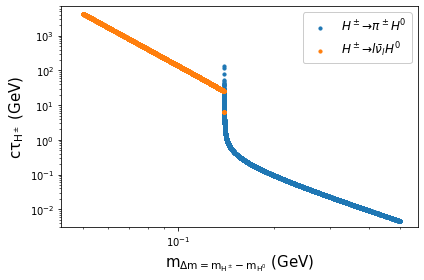

In [111]:
plt.figure(figsize=(6,4))
pions = df[df['pions']]
nopions = df[~df['pions']]
plt.scatter(pions['deltaM'], pions['dHc'], label=r"$H^\pm \to \pi^\pm H^0$", s=10)
plt.scatter(nopions['deltaM'], nopions['dHc'], label=r"$H^\pm \to l\bar{\nu}_l H^0$", s=10)



lgd = plt.legend(loc='upper right', framealpha=1.,fontsize=12)

plt.ylim(3E-3,7E3)
# plt.xlim(0,800)
plt.yscale('log')
plt.xscale('log')
# plt.title(r"Scalar dark matter, $\mathregular{H^\pm \to (\pi^\pm\;\rm{or}\;ff') H^0}$",fontsize = 15)
plt.ylabel(r'$\mathregular{c\tau_{H^\pm}}$ (GeV)',fontsize = 15)
plt.xlabel(r'$\mathregular{m_{\Delta m = m_{H^\pm} - m_{H^0}}}$ (GeV)',fontsize = 15)
plt.tight_layout()
file = os.path.join(path, "hpWidth.png")
plt.savefig(file)
plt.show()